# Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels
import scipy
from scipy import stats
from scipy.stats import boxcox
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare
from sklearn.metrics import ConfusionMatrixDisplay

# Read in Data

In [3]:
shelter = pd.read_csv(r'Animal_Shelter_Animals.csv')
pd.set_option('display.max_columns', None)
shelter.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoptable Cat Glass Colony,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoptable Dogs,04/24/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,04/15/2017 12:00:00 AM,Adoption,False,02/28/2020 12:00:00 AM,Stray,NaN,Died in care,False,False,False
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,02/29/2020 12:00:00 AM,Reclaimed,False,NaN,Stray,NaN,Died in care,False,False,False
4,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,04/18/2017 12:00:00 AM,Foster,False,05/29/2018 12:00:00 AM,Stray,NaN,Died in care,False,False,False


# Analyze data
## Check Data Types

In [6]:
shelter.dtypes

id                   int64
intakedate          object
intakereason        object
istransfer            bool
sheltercode         object
identichipnumber    object
animalname          object
breedname           object
basecolour          object
speciesname         object
animalage           object
sexname             object
location            object
movementdate        object
movementtype        object
istrial               bool
returndate          object
returnedreason      object
deceaseddate        object
deceasedreason      object
diedoffshelter        bool
puttosleep            bool
isdoa                 bool
dtype: object

## View the sum of unique values in movementtype and speciesname

In [7]:
shelter.movementtype.value_counts()

Adoption            11105
Foster               4984
Reclaimed            2485
Transfer              711
None                   61
Released To Wild       36
Escaped                 9
Stolen                  8
Name: movementtype, dtype: int64

In [8]:
shelter.speciesname.value_counts()

Cat                 11708
Dog                  6661
House Rabbit          353
Guinea Pig            190
Rat                   165
Bird                   80
Livestock              40
Hamster                26
Mouse                  20
Gerbil                 18
Hedgehog               18
Ferret                 14
Wildlife - other       14
Snake                  14
Lizard                 13
Pig                    13
Chicken                10
Turtle                  8
Sugar Glider            7
Opossum                 6
Fish                    6
Goat                    5
Chinchilla              4
Tortoise                3
Squirrel                1
Tarantula               1
Raccoon                 1
Name: speciesname, dtype: int64

## Query for cat only and dog only information

In [9]:
Cat = shelter.query('speciesname == "Cat"')
Cat.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoptable Cat Glass Colony,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
4,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,04/18/2017 12:00:00 AM,Foster,False,05/29/2018 12:00:00 AM,Stray,NaN,Died in care,False,False,False
5,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,05/29/2018 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
13,46437,10/26/2016 12:00:00 AM,Abandoned,False,C16103406,981020017650993,Nova,Domestic Long Hair,Black,Cat,12 years 3 months.,Female,Stray Cats,03/25/2017 12:00:00 AM,Foster,False,04/07/2017 12:00:00 AM,Stray,02/10/2018 12:00:00 AM,"UU - untreatable, unmanageable health",False,True,False
14,46437,10/26/2016 12:00:00 AM,Abandoned,False,C16103406,981020017650993,Nova,Domestic Long Hair,Black,Cat,12 years 3 months.,Female,Stray Cats,04/07/2017 12:00:00 AM,Adoption,False,02/09/2018 12:00:00 AM,Incompatible with owner lifestyle,02/10/2018 12:00:00 AM,"UU - untreatable, unmanageable health",False,True,False


In [10]:
# Check for # of rows and columns
Cat.shape

(11708, 23)

In [11]:
Dog = shelter.query('speciesname == "Dog"')
Dog.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoptable Dogs,04/24/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,04/15/2017 12:00:00 AM,Adoption,False,02/28/2020 12:00:00 AM,Stray,NaN,Died in care,False,False,False
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,02/29/2020 12:00:00 AM,Reclaimed,False,NaN,Stray,NaN,Died in care,False,False,False
6,31469,03/26/2013 12:00:00 AM,Incompatible with owner lifestyle,False,D1303720,981020007006095,Bonnie,Basenji/Mix,Brown and White,Dog,7 years 6 months.,Female,Stray Dogs Beta,03/30/2013 12:00:00 AM,Adoption,False,05/08/2017 12:00:00 AM,Incompatible with owner lifestyle,NaN,Died in care,False,False,False
7,31469,03/26/2013 12:00:00 AM,Incompatible with owner lifestyle,False,D1303720,981020007006095,Bonnie,Basenji/Mix,Brown and White,Dog,7 years 6 months.,Female,Stray Dogs Beta,05/09/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False


In [12]:
# Check for # of rows and columns
Dog.shape

(6661, 23)

## Bar graph of movementtypes for cats only and dogs only

<AxesSubplot:title={'center':'Cat Movement Type'}>

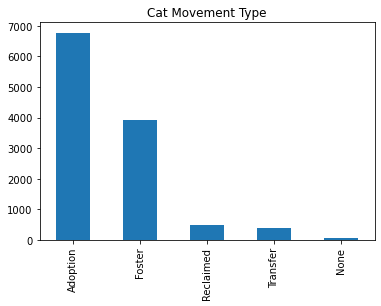

In [13]:
plt.title('Cat Movement Type')
Cat['movementtype'].value_counts().nlargest(5).plot.bar()

<AxesSubplot:title={'center':'Dog Movement Type'}>

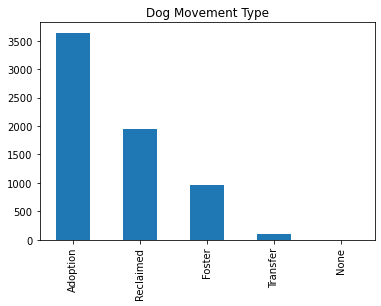

In [14]:
plt.title('Dog Movement Type')
Dog['movementtype'].value_counts().nlargest(5).plot.bar()

## Analyze by species

In [15]:
speciesAnalysis = shelter.groupby('speciesname')
speciesAnalysis = speciesAnalysis.count()
speciesAnalysis = speciesAnalysis.sort_values(['animalage'], ascending=False)

In [16]:
speciesAnalysis.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
speciesname,,,,,,,,,,,,,,,,,,,,,,
Cat,11708,11708,11707,11708,11708,10676,11708,11708,11708,11708,11708,11708,11653,11708,11708,4411,11708,347,11708,11708,11708,11708
Dog,6661,6661,6661,6661,6661,5674,6661,6660,6661,6661,6661,6661,6657,6661,6661,2124,6661,187,6661,6661,6661,6661
House Rabbit,353,353,352,353,353,2,353,353,353,353,353,353,353,353,353,89,353,3,353,353,353,353
Guinea Pig,190,190,190,190,190,0,190,186,190,190,190,190,190,190,190,19,190,0,190,190,190,190
Rat,165,165,165,165,165,0,165,165,165,165,165,165,165,165,165,9,165,0,165,165,165,165


# Data Wrangling

## Split Dates and Remove Time

In [17]:
shelter1 = shelter['intakedate'].str.split(' ', expand = True).rename(columns = lambda x: "intakedate"+str(x+1))

In [18]:
shelter1.head()

,intakedate1,intakedate2,intakedate3
0,11/28/2009,12:00:00,AM
1,12/08/2009,12:00:00,AM
2,08/10/2012,12:00:00,AM
3,08/10/2012,12:00:00,AM
4,01/11/2013,12:00:00,AM


In [19]:
shelter2 = shelter['movementdate'].str.split(' ', expand = True).rename(columns = lambda x: "movementDate"+str(x+1))

In [20]:
shelter2.head()

,movementDate1,movementDate2,movementDate3
0,05/13/2017,12:00:00,AM
1,04/24/2017,12:00:00,AM
2,04/15/2017,12:00:00,AM
3,02/29/2020,12:00:00,AM
4,04/18/2017,12:00:00,AM


## Merge columns back together and rename date-only columns

In [21]:
shelterUpdated = pd.concat([shelter, shelter1, shelter2], axis = 1)

In [22]:
shelterUpdated.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,intakedate1,intakedate2,intakedate3,movementDate1,movementDate2,movementDate3
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoptable Cat Glass Colony,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False,11/28/2009,12:00:00,AM,05/13/2017,12:00:00,AM
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoptable Dogs,04/24/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False,12/08/2009,12:00:00,AM,04/24/2017,12:00:00,AM
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,04/15/2017 12:00:00 AM,Adoption,False,02/28/2020 12:00:00 AM,Stray,NaN,Died in care,False,False,False,08/10/2012,12:00:00,AM,04/15/2017,12:00:00,AM
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,02/29/2020 12:00:00 AM,Reclaimed,False,NaN,Stray,NaN,Died in care,False,False,False,08/10/2012,12:00:00,AM,02/29/2020,12:00:00,AM
4,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,04/18/2017 12:00:00 AM,Foster,False,05/29/2018 12:00:00 AM,Stray,NaN,Died in care,False,False,False,01/11/2013,12:00:00,AM,04/18/2017,12:00:00,AM


## Rename columns

In [23]:
shelterUpdated.rename(columns={'intakedate1' : 'intakeDate', 'movementDate1' : 'movementDate'}, inplace=True)

## Drop unneeded columns

In [24]:
shelterUpdated.drop(['intakedate', 'istransfer', 'sheltercode', 'identichipnumber', 'location', 'istrial', 'deceaseddate',
                     'deceasedreason', 'diedoffshelter', 'movementdate', 'returndate', 'returnedreason', 'puttosleep', 
                     'isdoa', 'intakedate2', 'intakedate3', 'movementDate2', 'movementDate3'], axis=1, inplace=True)

In [25]:
shelterUpdated.head()

,id,intakereason,animalname,breedname,basecolour,speciesname,animalage,sexname,movementtype,intakeDate,movementDate
0,15801,Moving,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoption,11/28/2009,05/13/2017
1,15932,Moving,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoption,12/08/2009,04/24/2017
2,28859,Abandoned,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Adoption,08/10/2012,04/15/2017
3,28859,Abandoned,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Reclaimed,08/10/2012,02/29/2020
4,30812,Abandoned,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Foster,01/11/2013,04/18/2017


## Copy the animalage column to prep for dictionary recoding of cat age groups

In [47]:
shelterUpdated['CatAgeGroup'] = shelterUpdated['animalage']
shelterUpdated['DogAgeGroup'] = shelterUpdated['animalage']

In [48]:
shelterUpdated.head()

,id,intakereason,animalname,breedname,basecolour,speciesname,animalage,sexname,movementtype,intakeDate,movementDate,CatAgeGroup,DogAgeGroup
0,15801,Moving,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoption,11/28/2009,05/13/2017,11 years 8 months.,11 years 8 months.
1,15932,Moving,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoption,12/08/2009,04/24/2017,10 years 9 months.,10 years 9 months.
2,28859,Abandoned,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Adoption,08/10/2012,04/15/2017,8 years 1 month.,8 years 1 month.
3,28859,Abandoned,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Reclaimed,08/10/2012,02/29/2020,8 years 1 month.,8 years 1 month.
4,30812,Abandoned,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Foster,01/11/2013,04/18/2017,10 years 6 months.,10 years 6 months.


## View count of unique values in each column

In [49]:
shelterUpdated.nunique()

id              12899
intakereason       26
animalname       6887
breedname        1077
basecolour         80
speciesname        20
animalage         316
sexname             3
movementtype        7
intakeDate       1702
movementDate     1713
CatAgeGroup       316
DogAgeGroup       316
dtype: int64

In [29]:
##### Used to view all unique age entries #####
# uniqueAges = shelterUpdated['animalage'].unique()
# print(sorted(uniqueAges))

## Dictionary to define all Cat ages into age groups

In [60]:
dictionaryCat = { 'CatAgeGroup':
                  # Kitten: Birth until 7 months of age
                      {   "0 days.": "Kitten", 
                          "1 day.": "Kitten", 
                          "2 days.": "Kitten", 
                          "3 days.": "Kitten", 
                          "4 days.": "Kitten", 
                          "5 days.": "Kitten", 
                          "1 week.": "Kitten", 
                          "2 weeks.": "Kitten", 
                          "3 weeks.": "Kitten", 
                          "4 weeks.": "Kitten", 
                          "5 weeks.": "Kitten", 
                          "6 weeks.": "Kitten", 
                          "7 weeks.": "Kitten", 
                          "8 weeks.": "Kitten", 
                          "9 weeks.": "Kitten", 
                          "10 weeks.": "Kitten", 
                          "11 weeks.": "Kitten", 
                          "12 weeks.": "Kitten", 
                          "14 weeks.": "Kitten", 
                          "15 weeks.": "Kitten", 
                          "16 weeks.": "Kitten", 
                          "17 weeks.": "Kitten", 
                          "18 weeks.": "Kitten", 
                          "19 weeks.": "Kitten", 
                          "20 weeks.": "Kitten", 
                          "21 weeks.": "Kitten", 
                          "22 weeks.": "Kitten",
                          "23 weeks.": "Kitten", 
                          "24 weeks.": "Kitten", 
                          "25 weeks.": "Kitten", 
                          "26 weeks.": "Kitten", 
                          "6 months.": "Kitten",
                          "7 months.": "Kitten",
                    # Adolescent: 8 months until 2 years old
                          "8 months.": "Adolescent",
                          "9 months.": "Adolescent",
                          "10 months.": "Adolescent",
                          "11 months.": "Adolescent",
                          "1 year 0 months.": "Adolescent",
                          "1 year 1 month.": "Adolescent",
                          "1 year 2 months.": "Adolescent",
                          "1 year 3 months.": "Adolescent",
                          "1 year 4 months.": "Adolescent",
                          "1 year 5 months.": "Adolescent",
                          "1 year 6 months.": "Adolescent",
                          "1 year 7 months.": "Adolescent",
                          "1 year 8 months.": "Adolescent",
                          "1 year 9 months.": "Adolescent",
                          "1 year 10 months.": "Adolescent",
                          "1 year 11 months.": "Adolescent",
                    # Adult: 2-6 years old
                        "2 years 0 months.": "Adult",
                        "2 years 1 month.": "Adult",
                        "2 years 2 months.": "Adult",
                        "2 years 3 months.": "Adult",
                        "2 years 4 months.": "Adult",
                        "2 years 5 months.": "Adult",
                        "2 years 6 months.": "Adult",
                        "2 years 7 months.": "Adult",
                        "2 years 8 months.": "Adult",
                        "2 years 9 months.": "Adult",
                        "2 years 10 months.": "Adult",
                        "2 years 11 months.": "Adult",
                        "3 years 0 months.": "Adult",
                        "3 years 1 month.": "Adult",
                        "3 years 2 months.": "Adult",
                        "3 years 3 months.": "Adult",
                        "3 years 4 months.": "Adult",
                        "3 years 5 months.": "Adult",
                        "3 years 6 months.": "Adult",
                        "3 years 7 months.": "Adult",
                        "3 years 8 months.": "Adult",
                        "3 years 9 months.": "Adult",
                        "3 years 10 months.": "Adult",
                        "3 years 11 months.": "Adult",
                        "4 years 0 months.": "Adult",
                        "4 years 1 month.": "Adult",
                        "4 years 2 months.": "Adult",
                        "4 years 3 months.": "Adult",
                        "4 years 4 months.": "Adult",
                        "4 years 5 months.": "Adult",
                        "4 years 6 months.": "Adult",
                        "4 years 7 months.": "Adult",
                        "4 years 8 months.": "Adult",
                        "4 years 9 months.": "Adult",
                        "4 years 10 months.": "Adult",
                        "4 years 11 months.": "Adult",
                        "5 years 0 months.": "Adult",
                        "5 years 1 month.": "Adult",
                        "5 years 2 months.": "Adult",
                        "5 years 3 months.": "Adult",
                        "5 years 4 months.": "Adult",
                        "5 years 5 months.": "Adult",
                        "5 years 6 months.": "Adult",
                        "5 years 7 months.": "Adult",
                        "5 years 8 months.": "Adult",
                        "5 years 9 months.": "Adult",
                        "5 years 10 months.": "Adult",
                        "5 years 11 months.": "Adult",
                        "6 years 0 months.": "Adult",
                        "6 years 1 month.": "Adult",
                        "6 years 2 months.": "Adult",
                        "6 years 3 months.": "Adult",
                        "6 years 4 months.": "Adult",
                        "6 years 5 months.": "Adult",
                        "6 years 6 months.": "Adult",
                        "6 years 7 months.": "Adult",
                        "6 years 8 months.": "Adult",
                        "6 years 9 months.": "Adult",
                        "6 years 10 months.": "Adult",
                        "6 years 11 months.": "Adult",
                    # Mature: 7-10 years old
                        "7 years 0 months.": "Mature",
                        "7 years 1 month.": "Mature",
                        "7 years 2 months.": "Mature",
                        "7 years 3 months.": "Mature",
                        "7 years 4 months.": "Mature",
                        "7 years 5 months.": "Mature",
                        "7 years 6 months.": "Mature",
                        "7 years 7 months.": "Mature",
                        "7 years 8 months.": "Mature",
                        "7 years 9 months.": "Mature",
                        "7 years 10 months.": "Mature",
                        "7 years 11 months.": "Mature",
                        "8 years 0 months.": "Mature",
                        "8 years 1 month.": "Mature",
                        "8 years 2 months.": "Mature",
                        "8 years 3 months.": "Mature",
                        "8 years 4 months.": "Mature",
                        "8 years 5 months.": "Mature",
                        "8 years 6 months.": "Mature",
                        "8 years 7 months.": "Mature",
                        "8 years 8 months.": "Mature",
                        "8 years 9 months.": "Mature",
                        "8 years 10 months.": "Mature",
                        "8 years 11 months.": "Mature",                       
                        "9 years 0 months.": "Mature",
                        "9 years 1 month.": "Mature",
                        "9 years 2 months.": "Mature",
                        "9 years 3 months.": "Mature",
                        "9 years 4 months.": "Mature",
                        "9 years 5 months.": "Mature",
                        "9 years 6 months.": "Mature",
                        "9 years 7 months.": "Mature",
                        "9 years 8 months.": "Mature",
                        "9 years 9 months.": "Mature",
                        "9 years 10 months.": "Mature",
                        "9 years 11 months.": "Mature",
                        "10 years 0 months.": "Mature",
                        "10 years 1 month.": "Mature",
                        "10 years 2 months.": "Mature",
                        "10 years 3 months.": "Mature",
                        "10 years 4 months.": "Mature",
                        "10 years 5 months.": "Mature",
                        "10 years 6 months.": "Mature",
                        "10 years 7 months.": "Mature",
                        "10 years 8 months.": "Mature",
                        "10 years 9 months.": "Mature",
                        "10 years 10 months.": "Mature",
                        "10 years 11 months.": "Mature",
                    # Senior: 11-14 years old
                        "11 years 0 months.": "Senior",
                        "11 years 1 month.": "Senior",
                        "11 years 2 months.": "Senior",
                        "11 years 3 months.": "Senior",
                        "11 years 4 months.": "Senior",
                        "11 years 5 months.": "Senior",
                        "11 years 6 months.": "Senior",
                        "11 years 7 months.": "Senior",
                        "11 years 8 months.": "Senior",
                        "11 years 9 months.": "Senior",
                        "11 years 10 months.": "Senior",
                        "11 years 11 months.": "Senior",
                        "12 years 0 months.": "Senior",
                        "12 years 1 month.": "Senior",
                        "12 years 2 months.": "Senior",
                        "12 years 3 months.": "Senior",
                        "12 years 4 months.": "Senior",
                        "12 years 5 months.": "Senior",
                        "12 years 6 months.": "Senior",
                        "12 years 7 months.": "Senior",
                        "12 years 8 months.": "Senior",
                        "12 years 9 months.": "Senior",
                        "12 years 10 months.": "Senior",
                        "12 years 11 months.": "Senior",
                        "13 years 0 months.": "Senior",
                        "13 years 1 month.": "Senior",
                        "13 years 2 months.": "Senior",
                        "13 years 3 months.": "Senior",
                        "13 years 4 months.": "Senior",
                        "13 years 5 months.": "Senior",
                        "13 years 6 months.": "Senior",
                        "13 years 7 months.": "Senior",
                        "13 years 8 months.": "Senior",
                        "13 years 9 months.": "Senior",
                        "13 years 10 months.": "Senior",
                        "13 years 11 months.": "Senior",
                        "14 years 0 months.": "Senior",
                        "14 years 1 month.": "Senior",
                        "14 years 2 months.": "Senior",
                        "14 years 3 months.": "Senior",
                        "14 years 4 months.": "Senior",
                        "14 years 5 months.": "Senior",
                        "14 years 6 months.": "Senior",
                        "14 years 7 months.": "Senior",
                        "14 years 8 months.": "Senior",
                        "14 years 9 months.": "Senior",
                        "14 years 10 months.": "Senior",
                        "14 years 11 months.": "Senior",
                    # Geriatric: 15+ years old
                        "15 years 0 months.": "Geriatric",
                        "15 years 1 month.": "Geriatric",
                        "15 years 2 months.": "Geriatric",
                        "15 years 3 months.": "Geriatric",
                        "15 years 4 months.": "Geriatric",
                        "15 years 5 months.": "Geriatric",
                        "15 years 6 months.": "Geriatric",
                        "15 years 7 months.": "Geriatric",
                        "15 years 8 months.": "Geriatric",
                        "15 years 9 months.": "Geriatric",
                        "15 years 10 months.": "Geriatric",
                        "15 years 11 months.": "Geriatric",
                        "16 years 0 months.": "Geriatric",
                        "16 years 1 month.": "Geriatric",
                        "16 years 2 months.": "Geriatric",
                        "16 years 3 months.": "Geriatric",
                        "16 years 4 months.": "Geriatric",
                        "16 years 5 months.": "Geriatric",
                        "16 years 6 months.": "Geriatric",
                        "16 years 7 months.": "Geriatric",
                        "16 years 8 months.": "Geriatric",
                        "16 years 9 months.": "Geriatric",
                        "16 years 10 months.": "Geriatric",
                        "16 years 11 months.": "Geriatric",                    
                        "17 years 0 months.": "Geriatric",
                        "17 years 1 month.": "Geriatric",
                        "17 years 3 months.": "Geriatric",
                        "17 years 5 months.": "Geriatric",
                        "17 years 6 months.": "Geriatric",
                        "17 years 7 months.": "Geriatric",
                        "17 years 8 months.": "Geriatric",
                        "17 years 9 months.": "Geriatric",
                        "18 years 0 months.": "Geriatric",
                        "18 years 1 month.": "Geriatric",
                        "18 years 2 months.": "Geriatric",
                        "18 years 3 months.": "Geriatric",
                        "18 years 4 months.": "Geriatric",
                        "18 years 5 months.": "Geriatric",
                        "18 years 8 months.": "Geriatric",
                        "18 years 9 months.": "Geriatric",
                        "19 years 0 months.": "Geriatric",
                        "19 years 1 month.": "Geriatric",
                        "19 years 3 months.": "Geriatric",
                        "19 years 7 months.": "Geriatric",
                        "19 years 11 months.": "Geriatric",
                        "20 years 7 months.": "Geriatric",
                        "21 years 4 months.": "Geriatric",
                        "21 years 8 months.": "Geriatric",
                        "21 years 10 months.": "Geriatric",
                    # Unknown: 28+ years old
                        "28 years 0 months.": "Unknown",
                        "28 years 2 months.": "Unknown",
                        "28 years 6 months.": "Unknown",
                        "28 years 8 months.": "Unknown",
                        "28 years 9 months.": "Unknown",
                        "28 years 11 months.": "Unknown",
                        "29 years 0 months.": "Unknown",
                        "29 years 4 months.": "Unknown",
                        "29 years 9 months.": "Unknown",
                        "30 years 0 months.": "Unknown",
                        "30 years 1 month.": "Unknown",
                        "30 years 2 months.": "Unknown",
                        "30 years 4 months.": "Unknown",
                        "30 years 5 months.": "Unknown",
                        "30 years 6 months.": "Unknown",
                        "30 years 7 months.": "Unknown",
                        "30 years 8 months.": "Unknown",
                        "30 years 9 months.": "Unknown",
                        "30 years 10 months.": "Unknown",
                        "31 years 0 months.": "Unknown",
                        "31 years 1 month.": "Unknown",
                        "31 years 2 months.": "Unknown",  
                        "31 years 3 months.": "Unknown",                       
                        "31 years 6 months.": "Unknown",                       
                        "31 years 10 months.": "Unknown",           
                        "32 years 0 months.": "Unknown",
                        "32 years 2 months.": "Unknown",  
                        "32 years 3 months.": "Unknown",                       
                        "32 years 6 months.": "Unknown", 
                        "32 years 7 months.": "Unknown",                       
                        "32 years 10 months.": "Unknown",   
                        "33 years 0 months.": "Unknown",
                        "33 years 1 month.": "Unknown",
                        "33 years 6 months.": "Unknown",
                        "33 years 10 months.": "Unknown",
                        "34 years 2 months.": "Unknown",
                        "34 years 5 months.": "Unknown",
                        "34 years 6 months.": "Unknown",
                        "34 years 9 months.": "Unknown",
                        "35 years 1 month.": "Unknown",
                        "35 years 5 months.": "Unknown",  
                        "35 years 6 months.": "Unknown",      
                        "35 years 8 months.": "Unknown",                       
                        "35 years 10 months.": "Unknown",  
                        "36 years 0 months.": "Unknown",
                        "37 years 4 months.": "Unknown",  
                        "58 years 4 months.": "Unknown",  
                        "99 years 0 months.": "Unknown",
                        "99 years 1 month.": "Unknown",
                        "99 years 3 months.": "Unknown",
                        "99 years 5 months.": "Unknown",
                        "99 years 7 months.": "Unknown",
                        "100 years 0 months.": "Unknown",
                        "100 years 3 months.": "Unknown",
                        "100 years 7 months.": "Unknown",
                        "100 years 9 months.": "Unknown",
                        "101 years 0 months.": "Unknown",
                        "101 years 3 months.": "Unknown",
                        "101 years 7 months.": "Unknown",
                        "101 years 10 months.": "Unknown",
                        "101 years 11 months.": "Unknown",
                        "102 years 0 months.": "Unknown",
                        "102 years 1 month.": "Unknown",
                        "102 years 2 months.": "Unknown",
                        "972 years 6 months.": "Unknown"
                    }}
shelterUpdated.replace(dictionaryCat, inplace=True)

In [59]:
dictionaryDog = { 'DogAgeGroup':
                  # Puppy: Birth until 7 months of age
                      {   "0 days.": "Puppy", 
                          "1 day.": "Puppy", 
                          "2 days.": "Puppy", 
                          "3 days.": "Puppy", 
                          "4 days.": "Puppy", 
                          "5 days.": "Puppy", 
                          "1 week.": "Puppy", 
                          "2 weeks.": "Puppy", 
                          "3 weeks.": "Puppy", 
                          "4 weeks.": "Puppy", 
                          "5 weeks.": "Puppy", 
                          "6 weeks.": "Puppy", 
                          "7 weeks.": "Puppy", 
                          "8 weeks.": "Puppy", 
                          "9 weeks.": "Puppy", 
                          "10 weeks.": "Puppy", 
                          "11 weeks.": "Puppy", 
                          "12 weeks.": "Puppy", 
                          "14 weeks.": "Puppy", 
                          "15 weeks.": "Puppy", 
                          "16 weeks.": "Puppy", 
                          "17 weeks.": "Puppy", 
                          "18 weeks.": "Puppy", 
                          "19 weeks.": "Puppy", 
                          "20 weeks.": "Puppy", 
                          "21 weeks.": "Puppy", 
                          "22 weeks.": "Puppy",
                          "23 weeks.": "Puppy", 
                          "24 weeks.": "Puppy", 
                          "25 weeks.": "Puppy", 
                          "26 weeks.": "Puppy", 
                          "6 months.": "Puppy",
                          "7 months.": "Puppy",
                    # Adolescent: 8 months until 2 years old
                          "8 months.": "Adolescent",
                          "9 months.": "Adolescent",
                          "10 months.": "Adolescent",
                          "11 months.": "Adolescent",
                          "1 year 0 months.": "Adolescent",
                          "1 year 1 month.": "Adolescent",
                          "1 year 2 months.": "Adolescent",
                          "1 year 3 months.": "Adolescent",
                          "1 year 4 months.": "Adolescent",
                          "1 year 5 months.": "Adolescent",
                          "1 year 6 months.": "Adolescent",
                          "1 year 7 months.": "Adolescent",
                          "1 year 8 months.": "Adolescent",
                          "1 year 9 months.": "Adolescent",
                          "1 year 10 months.": "Adolescent",
                          "1 year 11 months.": "Adolescent",
                    # Adult: 2-5 years old
                        "2 years 0 months.": "Adult",
                        "2 years 1 month.": "Adult",
                        "2 years 2 months.": "Adult",
                        "2 years 3 months.": "Adult",
                        "2 years 4 months.": "Adult",
                        "2 years 5 months.": "Adult",
                        "2 years 6 months.": "Adult",
                        "2 years 7 months.": "Adult",
                        "2 years 8 months.": "Adult",
                        "2 years 9 months.": "Adult",
                        "2 years 10 months.": "Adult",
                        "2 years 11 months.": "Adult",
                        "3 years 0 months.": "Adult",
                        "3 years 1 month.": "Adult",
                        "3 years 2 months.": "Adult",
                        "3 years 3 months.": "Adult",
                        "3 years 4 months.": "Adult",
                        "3 years 5 months.": "Adult",
                        "3 years 6 months.": "Adult",
                        "3 years 7 months.": "Adult",
                        "3 years 8 months.": "Adult",
                        "3 years 9 months.": "Adult",
                        "3 years 10 months.": "Adult",
                        "3 years 11 months.": "Adult",
                        "4 years 0 months.": "Adult",
                        "4 years 1 month.": "Adult",
                        "4 years 2 months.": "Adult",
                        "4 years 3 months.": "Adult",
                        "4 years 4 months.": "Adult",
                        "4 years 5 months.": "Adult",
                        "4 years 6 months.": "Adult",
                        "4 years 7 months.": "Adult",
                        "4 years 8 months.": "Adult",
                        "4 years 9 months.": "Adult",
                        "4 years 10 months.": "Adult",
                        "4 years 11 months.": "Adult",
                        "5 years 0 months.": "Adult",
                        "5 years 1 month.": "Adult",
                        "5 years 2 months.": "Adult",
                        "5 years 3 months.": "Adult",
                        "5 years 4 months.": "Adult",
                        "5 years 5 months.": "Adult",
                        "5 years 6 months.": "Adult",
                        "5 years 7 months.": "Adult",
                        "5 years 8 months.": "Adult",
                        "5 years 9 months.": "Adult",
                        "5 years 10 months.": "Adult",
                        "5 years 11 months.": "Adult",
                    # Mature: 6-8 years old
                        "6 years 0 months.": "Mature",
                        "6 years 1 month.": "Mature",
                        "6 years 2 months.": "Mature",
                        "6 years 3 months.": "Mature",
                        "6 years 4 months.": "Mature",
                        "6 years 5 months.": "Mature",
                        "6 years 6 months.": "Mature",
                        "6 years 7 months.": "Mature",
                        "6 years 8 months.": "Mature",
                        "6 years 9 months.": "Mature",
                        "6 years 10 months.": "Mature",
                        "6 years 11 months.": "Mature",
                        "7 years 0 months.": "Mature",
                        "7 years 1 month.": "Mature",
                        "7 years 2 months.": "Mature",
                        "7 years 3 months.": "Mature",
                        "7 years 4 months.": "Mature",
                        "7 years 5 months.": "Mature",
                        "7 years 6 months.": "Mature",
                        "7 years 7 months.": "Mature",
                        "7 years 8 months.": "Mature",
                        "7 years 9 months.": "Mature",
                        "7 years 10 months.": "Mature",
                        "7 years 11 months.": "Mature",
                        "8 years 0 months.": "Mature",
                        "8 years 1 month.": "Mature",
                        "8 years 2 months.": "Mature",
                        "8 years 3 months.": "Mature",
                        "8 years 4 months.": "Mature",
                        "8 years 5 months.": "Mature",
                        "8 years 6 months.": "Mature",
                        "8 years 7 months.": "Mature",
                        "8 years 8 months.": "Mature",
                        "8 years 9 months.": "Mature",
                        "8 years 10 months.": "Mature",
                        "8 years 11 months.": "Mature",                       
                    # Senior: 9-11 years old
                        "9 years 0 months.": "Senior",
                        "9 years 1 month.": "Senior",
                        "9 years 2 months.": "Senior",
                        "9 years 3 months.": "Senior",
                        "9 years 4 months.": "Senior",
                        "9 years 5 months.": "Senior",
                        "9 years 6 months.": "Senior",
                        "9 years 7 months.": "Senior",
                        "9 years 8 months.": "Senior",
                        "9 years 9 months.": "Senior",
                        "9 years 10 months.": "Senior",
                        "9 years 11 months.": "Senior",
                        "10 years 0 months.": "Senior",
                        "10 years 1 month.": "Senior",
                        "10 years 2 months.": "Senior",
                        "10 years 3 months.": "Senior",
                        "10 years 4 months.": "Senior",
                        "10 years 5 months.": "Senior",
                        "10 years 6 months.": "Senior",
                        "10 years 7 months.": "Senior",
                        "10 years 8 months.": "Senior",
                        "10 years 9 months.": "Senior",
                        "10 years 10 months.": "Senior",
                        "10 years 11 months.": "Senior",
                        "11 years 0 months.": "Senior",
                        "11 years 1 month.": "Senior",
                        "11 years 2 months.": "Senior",
                        "11 years 3 months.": "Senior",
                        "11 years 4 months.": "Senior",
                        "11 years 5 months.": "Senior",
                        "11 years 6 months.": "Senior",
                        "11 years 7 months.": "Senior",
                        "11 years 8 months.": "Senior",
                        "11 years 9 months.": "Senior",
                        "11 years 10 months.": "Senior",
                        "11 years 11 months.": "Senior",
                    # Geriatric: 12+ years old
                        "12 years 0 months.": "Geriatric",
                        "12 years 1 month.": "Geriatric",
                        "12 years 2 months.": "Geriatric",
                        "12 years 3 months.": "Geriatric",
                        "12 years 4 months.": "Geriatric",
                        "12 years 5 months.": "Geriatric",
                        "12 years 6 months.": "Geriatric",
                        "12 years 7 months.": "Geriatric",
                        "12 years 8 months.": "Geriatric",
                        "12 years 9 months.": "Geriatric",
                        "12 years 10 months.": "Geriatric",
                        "12 years 11 months.": "Geriatric",
                        "13 years 0 months.": "Geriatric",
                        "13 years 1 month.": "Geriatric",
                        "13 years 2 months.": "Geriatric",
                        "13 years 3 months.": "Geriatric",
                        "13 years 4 months.": "Geriatric",
                        "13 years 5 months.": "Geriatric",
                        "13 years 6 months.": "Geriatric",
                        "13 years 7 months.": "Geriatric",
                        "13 years 8 months.": "Geriatric",
                        "13 years 9 months.": "Geriatric",
                        "13 years 10 months.": "Geriatric",
                        "13 years 11 months.": "Geriatric",
                        "14 years 0 months.": "Geriatric",
                        "14 years 1 month.": "Geriatric",
                        "14 years 2 months.": "Geriatric",
                        "14 years 3 months.": "Geriatric",
                        "14 years 4 months.": "Geriatric",
                        "14 years 5 months.": "Geriatric",
                        "14 years 6 months.": "Geriatric",
                        "14 years 7 months.": "Geriatric",
                        "14 years 8 months.": "Geriatric",
                        "14 years 9 months.": "Geriatric",
                        "14 years 10 months.": "Geriatric",
                        "14 years 11 months.": "Geriatric",
                        "15 years 0 months.": "Geriatric",
                        "15 years 1 month.": "Geriatric",
                        "15 years 2 months.": "Geriatric",
                        "15 years 3 months.": "Geriatric",
                        "15 years 4 months.": "Geriatric",
                        "15 years 5 months.": "Geriatric",
                        "15 years 6 months.": "Geriatric",
                        "15 years 7 months.": "Geriatric",
                        "15 years 8 months.": "Geriatric",
                        "15 years 9 months.": "Geriatric",
                        "15 years 10 months.": "Geriatric",
                        "15 years 11 months.": "Geriatric",
                        "16 years 0 months.": "Geriatric",
                        "16 years 1 month.": "Geriatric",
                        "16 years 2 months.": "Geriatric",
                        "16 years 3 months.": "Geriatric",
                        "16 years 4 months.": "Geriatric",
                        "16 years 5 months.": "Geriatric",
                        "16 years 6 months.": "Geriatric",
                        "16 years 7 months.": "Geriatric",
                        "16 years 8 months.": "Geriatric",
                        "16 years 9 months.": "Geriatric",
                        "16 years 10 months.": "Geriatric",
                        "16 years 11 months.": "Geriatric",                    
                        "17 years 0 months.": "Geriatric",
                        "17 years 1 month.": "Geriatric",
                        "17 years 3 months.": "Geriatric",
                        "17 years 5 months.": "Geriatric",
                        "17 years 6 months.": "Geriatric",
                        "17 years 7 months.": "Geriatric",
                        "17 years 8 months.": "Geriatric",
                        "17 years 9 months.": "Geriatric",
                        "18 years 0 months.": "Geriatric",
                        "18 years 1 month.": "Geriatric",
                        "18 years 2 months.": "Geriatric",
                        "18 years 3 months.": "Geriatric",
                        "18 years 4 months.": "Geriatric",
                        "18 years 5 months.": "Geriatric",
                        "18 years 8 months.": "Geriatric",
                        "18 years 9 months.": "Geriatric",
                        "19 years 0 months.": "Geriatric",
                        "19 years 1 month.": "Geriatric",
                        "19 years 3 months.": "Geriatric",
                        "19 years 7 months.": "Geriatric",
                        "19 years 11 months.": "Geriatric",
                        "20 years 7 months.": "Geriatric",
                        "21 years 4 months.": "Geriatric",
                        "21 years 8 months.": "Geriatric",
                        "21 years 10 months.": "Geriatric",
                    # Unknown: 22+ years old
                        "28 years 0 months.": "Unknown",
                        "28 years 2 months.": "Unknown",
                        "28 years 6 months.": "Unknown",
                        "28 years 8 months.": "Unknown",
                        "28 years 9 months.": "Unknown",
                        "28 years 11 months.": "Unknown",
                        "29 years 0 months.": "Unknown",
                        "29 years 4 months.": "Unknown",
                        "29 years 9 months.": "Unknown",
                        "30 years 0 months.": "Unknown",
                        "30 years 1 month.": "Unknown",
                        "30 years 2 months.": "Unknown",
                        "30 years 4 months.": "Unknown",
                        "30 years 5 months.": "Unknown",
                        "30 years 6 months.": "Unknown",
                        "30 years 7 months.": "Unknown",
                        "30 years 8 months.": "Unknown",
                        "30 years 9 months.": "Unknown",
                        "30 years 10 months.": "Unknown",
                        "31 years 0 months.": "Unknown",
                        "31 years 1 month.": "Unknown",
                        "31 years 2 months.": "Unknown",  
                        "31 years 3 months.": "Unknown",                       
                        "31 years 6 months.": "Unknown",                       
                        "31 years 10 months.": "Unknown",           
                        "32 years 0 months.": "Unknown",
                        "32 years 2 months.": "Unknown",  
                        "32 years 3 months.": "Unknown",                       
                        "32 years 6 months.": "Unknown", 
                        "32 years 7 months.": "Unknown",                       
                        "32 years 10 months.": "Unknown",   
                        "33 years 0 months.": "Unknown",
                        "33 years 1 month.": "Unknown",
                        "33 years 6 months.": "Unknown",
                        "33 years 10 months.": "Unknown",
                        "34 years 2 months.": "Unknown",
                        "34 years 5 months.": "Unknown",
                        "34 years 6 months.": "Unknown",
                        "34 years 9 months.": "Unknown",
                        "35 years 1 month.": "Unknown",
                        "35 years 5 months.": "Unknown",  
                        "35 years 6 months.": "Unknown",      
                        "35 years 8 months.": "Unknown",                       
                        "35 years 10 months.": "Unknown",  
                        "36 years 0 months.": "Unknown",
                        "37 years 4 months.": "Unknown",  
                        "58 years 4 months.": "Unknown",  
                        "99 years 0 months.": "Unknown",
                        "99 years 1 month.": "Unknown",
                        "99 years 3 months.": "Unknown",
                        "99 years 5 months.": "Unknown",
                        "99 years 7 months.": "Unknown",
                        "100 years 0 months.": "Unknown",
                        "100 years 3 months.": "Unknown",
                        "100 years 7 months.": "Unknown",
                        "100 years 9 months.": "Unknown",
                        "101 years 0 months.": "Unknown",
                        "101 years 3 months.": "Unknown",
                        "101 years 7 months.": "Unknown",
                        "101 years 10 months.": "Unknown",
                        "101 years 11 months.": "Unknown",
                        "102 years 0 months.": "Unknown",
                        "102 years 1 month.": "Unknown",
                        "102 years 2 months.": "Unknown",
                        "972 years 6 months.": "Unknown"
                    }}
shelterUpdated.replace(dictionaryDog, inplace=True)

## Drop missing values

In [50]:
shelterUpdated.dropna(inplace = True)

## Create a table with only Cats and Dogs

In [61]:
shelterCatsDogs = shelterUpdated[(shelterUpdated['speciesname'].isin(['Cat', 'Dog']))]
shelterCatsDogs.head()

,id,intakereason,animalname,breedname,basecolour,speciesname,animalage,sexname,movementtype,intakeDate,movementDate,CatAgeGroup,DogAgeGroup
0,15801,Moving,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoption,11/28/2009,05/13/2017,Senior,Senior
1,15932,Moving,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoption,12/08/2009,04/24/2017,Mature,Senior
2,28859,Abandoned,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Adoption,08/10/2012,04/15/2017,Mature,Mature
3,28859,Abandoned,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Reclaimed,08/10/2012,02/29/2020,Mature,Mature
4,30812,Abandoned,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Foster,01/11/2013,04/18/2017,Mature,Senior


### Split the movementDate into Month, Day, and Year

In [62]:
shelterSplitDate = shelterCatsDogs['movementDate'].str.split('/', expand = True).rename(columns = lambda x: 
                                                                                        "movementDate"+str(x+1))

In [63]:
shelterSplitDate.head()

,movementDate1,movementDate2,movementDate3
0,05,13,2017
1,04,24,2017
2,04,15,2017
3,02,29,2020
4,04,18,2017


### Merge date columns back together

In [64]:
shelterByMonth = pd.concat([shelterCatsDogs, shelterSplitDate], axis = 1)

In [65]:
shelterByMonth.rename(columns={'movementDate1' : 'Month', 'movementDate2' : 'Day', 'movementDate3' : 'Year'}, inplace=True)

In [66]:
shelterByMonth.head()

,id,intakereason,animalname,breedname,basecolour,speciesname,animalage,sexname,movementtype,intakeDate,movementDate,CatAgeGroup,DogAgeGroup,Month,Day,Year
0,15801,Moving,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoption,11/28/2009,05/13/2017,Senior,Senior,05,13,2017
1,15932,Moving,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoption,12/08/2009,04/24/2017,Mature,Senior,04,24,2017
2,28859,Abandoned,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Adoption,08/10/2012,04/15/2017,Mature,Mature,04,15,2017
3,28859,Abandoned,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Reclaimed,08/10/2012,02/29/2020,Mature,Mature,02,29,2020
4,30812,Abandoned,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Foster,01/11/2013,04/18/2017,Mature,Senior,04,18,2017


## Question 1: What time of the year are cats and dogs more likely to get adopted?

In [67]:
Cat1 = shelterByMonth.query('speciesname == "Cat"')
Cat1.shape

(11652, 16)

## Horizontal bar graph of Cat movement types by month

<AxesSubplot:ylabel='movementDate1'>

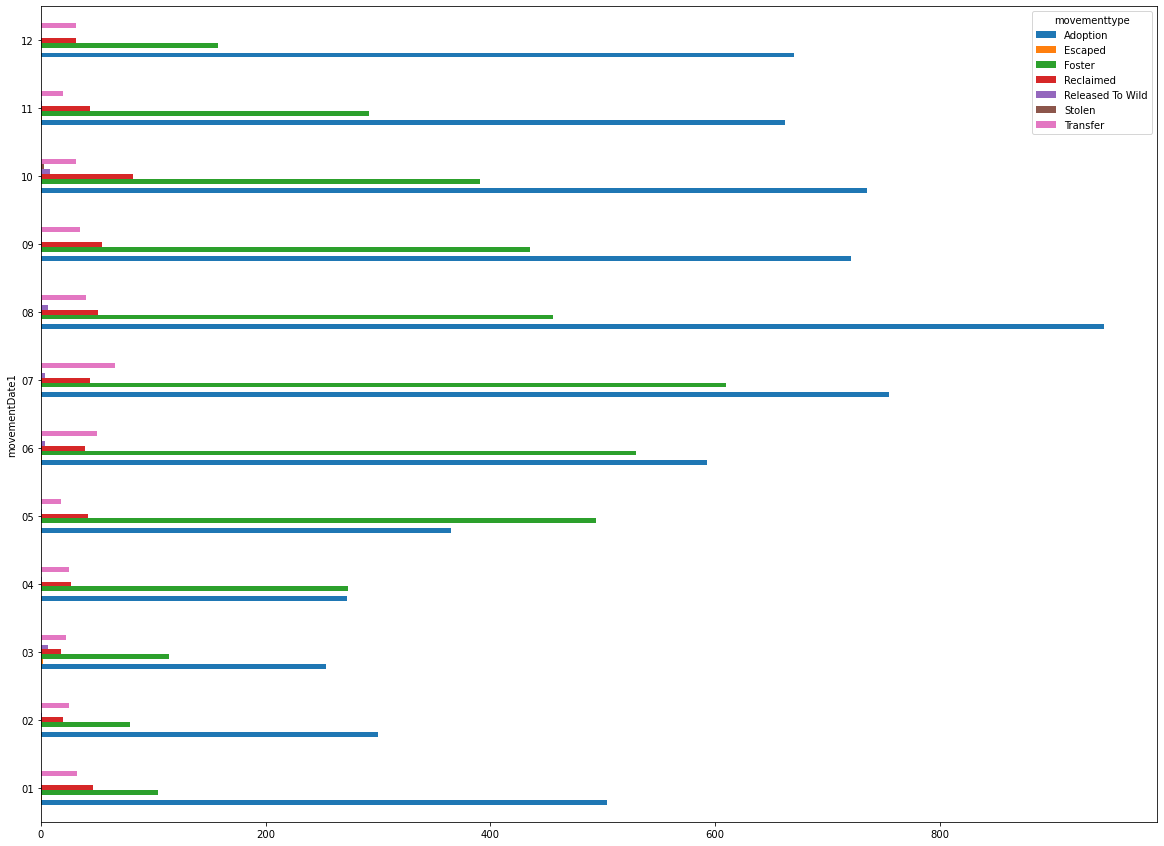

In [38]:
Cat1.groupby('movementtype').movementDate1.value_counts().unstack(0).plot.barh(figsize = (20,15))

### Cats were more likely to be adopted in the summer. The most cat adoptions occured in August.
## Horizontal bar graph of Dog movement types by month

In [39]:
Dog1 = shelterByMonth.query('speciesname == "Dog"')
Dog1.shape

(6656, 15)

<AxesSubplot:ylabel='movementDate1'>

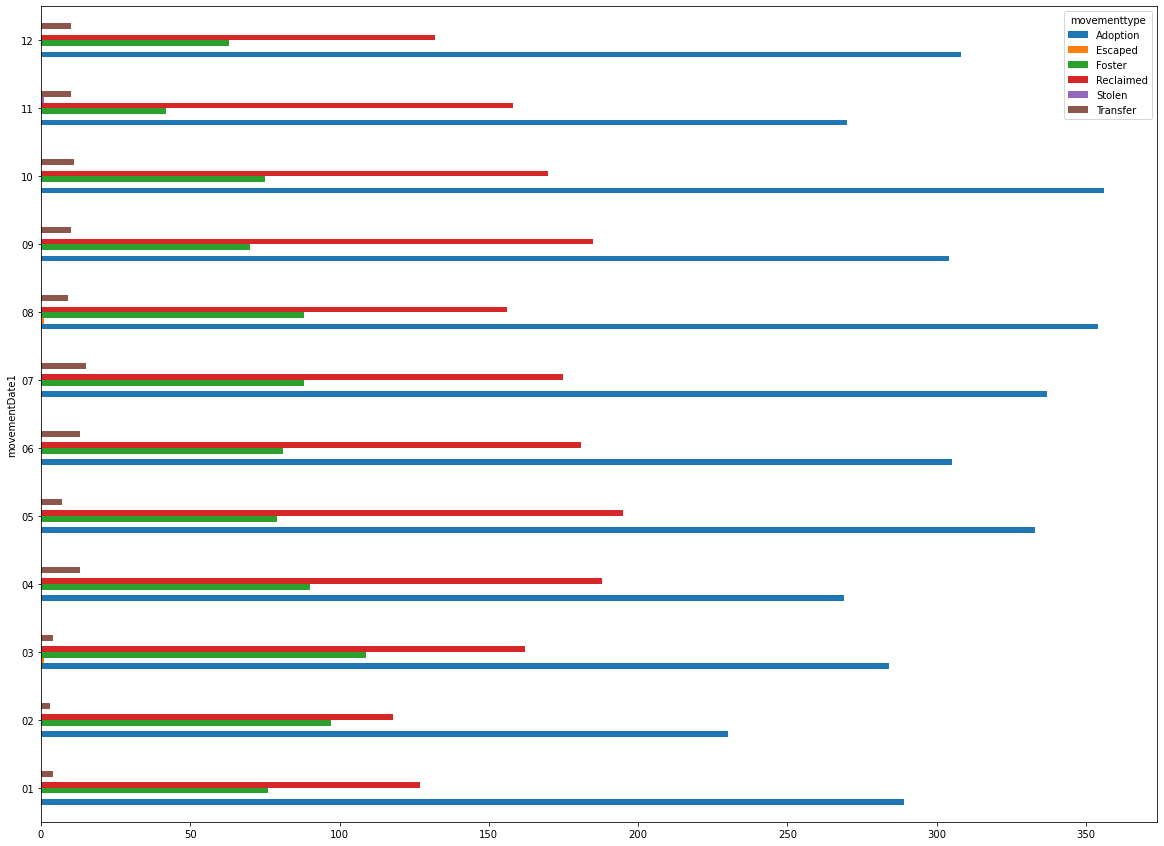

In [40]:
Dog1.groupby('movementtype').movementDate1.value_counts().unstack(0).plot.barh(figsize = (20,15))

### Dogs were more likely to be adopted during the months of August and October.

# Question 2: What influences the number of cats and dogs in a shelter over time?
## Bar graph of intakereason for cats only

<AxesSubplot:title={'center':'Cat Intake Reason'}>

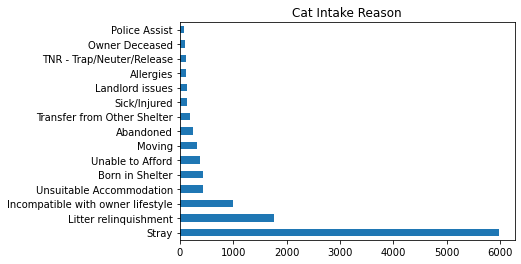

In [72]:
plt.title('Cat Intake Reason')
Cat1['intakereason'].value_counts().nlargest(15).plot.barh()

### The #1 reason cats are taken in by shelters is because they are stray. Litter relinquishment is reason #2 and Incompatible with owner lifestyle is #3.

## Bar graph of intakereason for dogs only

<AxesSubplot:title={'center':'Dog Intake Reason'}>

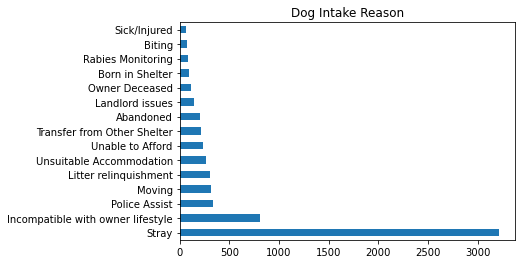

In [71]:
plt.title('Dog Intake Reason')
Dog1['intakereason'].value_counts().nlargest(15).plot.barh()

### The #1 reason dogs are taken in by shelters is because they are stray. Incompatible with owner lifestyle is #2 and Police Assist is #3.

In [70]:
shelterByMonth.to_csv(r'C:\Users\ardit\Desktop\Final-Project\shelterByMonth1.csv', index = False)